In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# configure visualization default
%matplotlib inline
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = 12,8
plt.rcParams['axes.labelsize']= 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1. Input data and preview

In [3]:
raw_df_train = pd.read_csv('Data/input/train.csv')
raw_df_test = pd.read_csv('Data/input/test.csv')

In [4]:
raw_dfs = [raw_df_train, raw_df_test]

In [5]:
raw_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
raw_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(raw_df_train.info())
print()
print(raw_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [25]:
print(raw_df_train.shape)
print()
print(raw_df_test.shape)

(891, 12)

(418, 11)


In [30]:
# check missing values
print(raw_df_train.isnull().sum())
print()
print(raw_df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 2. Explore and clean data

In [49]:
# drop PassengerId and Ticket column <-- has no relationship with Suivive rate
for df in raw_dfs:
    df.drop(['PassengerId','Ticket'], axis=1, inplace=True)
# drop Cabin column <-- too much missing value
for df in raw_dfs:
    df.drop('Cabin', axis=1, inplace=True)

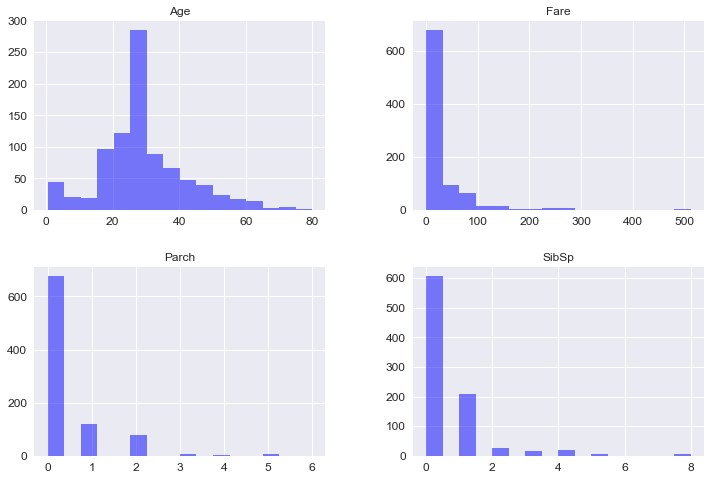

In [83]:
# explore continuous columns
raw_df_train[['Age', 'Fare', 'SibSp', 'Parch']].hist(color='blue', alpha=0.5, bins=16)
plt.show()

In [51]:
# explore categorical columns
for cat_column in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    print(raw_df_train[cat_column].value_counts(dropna=False),'\n')

0    549
1    342
Name: Survived, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64 



In [52]:
raw_df_train['Pclass'].value_counts().index.tolist()

[3, 1, 2]

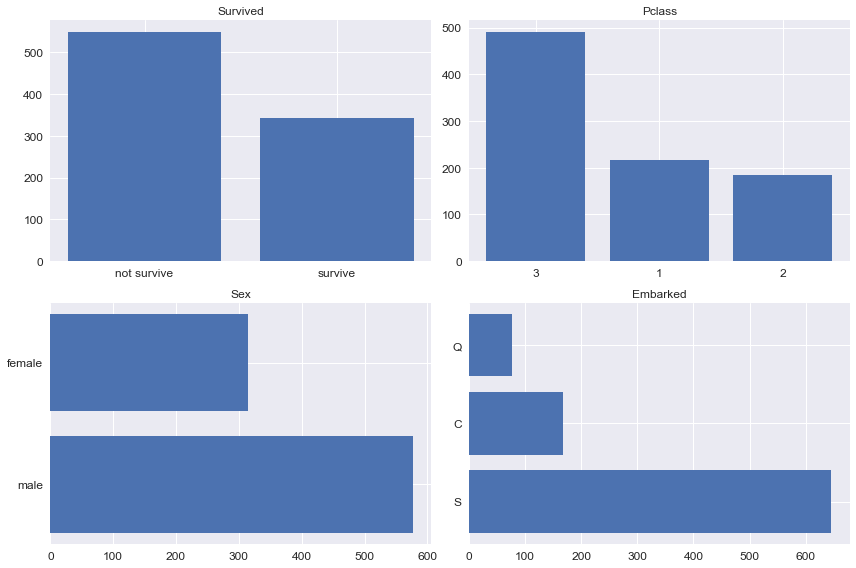

In [84]:
# visualize categorical columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.bar(['not survive', 'survive'], raw_df_train['Survived'].value_counts().values)
ax1.set_title('Survived')

ax2.bar(['3', '1', '2'], raw_df_train['Pclass'].value_counts().values)
ax2.set_title('Pclass')

ax3.barh(['male', 'female'], raw_df_train['Sex'].value_counts().values)
ax3.set_title('Sex')

ax4.barh(['S', 'C', 'Q'], raw_df_train['Embarked'].value_counts().values)
ax4.set_title('Embarked')

plt.tight_layout()
plt.show()

In [54]:
# handle missing values
# fill missing age with mean value <-- bell shape distribution
# fill Embarked with most frequent one class -- S
# fill Fare with median <-- positive skewed distribution
for df in raw_dfs:
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [55]:
# double check missing values
print(raw_df_train.isnull().sum())
print()
print(raw_df_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## 3. Descriptive analysis

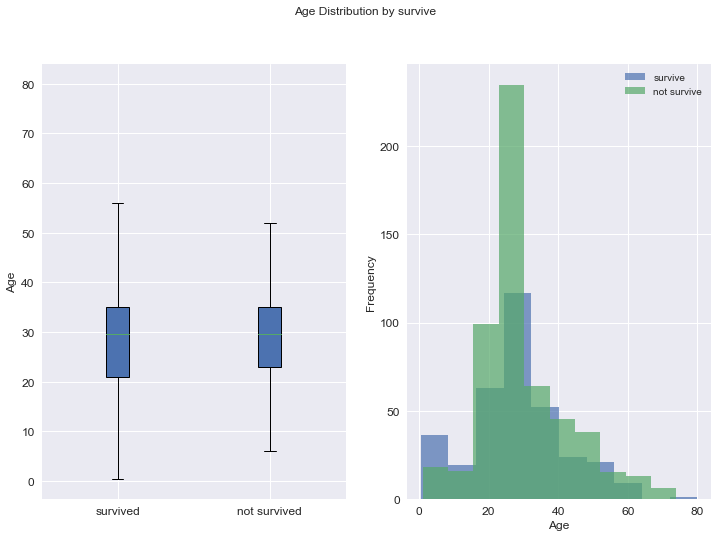

In [103]:
# analysis numerical variable with target variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

data = [raw_df_train[raw_df_train['Survived'] == 1].Age.values.tolist()] + [raw_df_train[raw_df_train['Survived'] == 0].Age.values.tolist()]
labels = ['survived', 'not survived']

ax1.boxplot(data, patch_artist=True, labels=labels)
ax1.set_ylabel('Age')

ax2.hist(raw_df_train[raw_df_train['Survived'] == 1].Age.values.tolist(), alpha=0.7, label='survive')
ax2.hist(raw_df_train[raw_df_train['Survived'] == 0].Age.values.tolist(), alpha=0.7, label='not survive')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Age')
ax2.legend()

plt.suptitle('Age Distribution by survive')
#plt.tight_layout()
plt.show()

# conclusion --> Age doesn't have an obvious effect on Survive

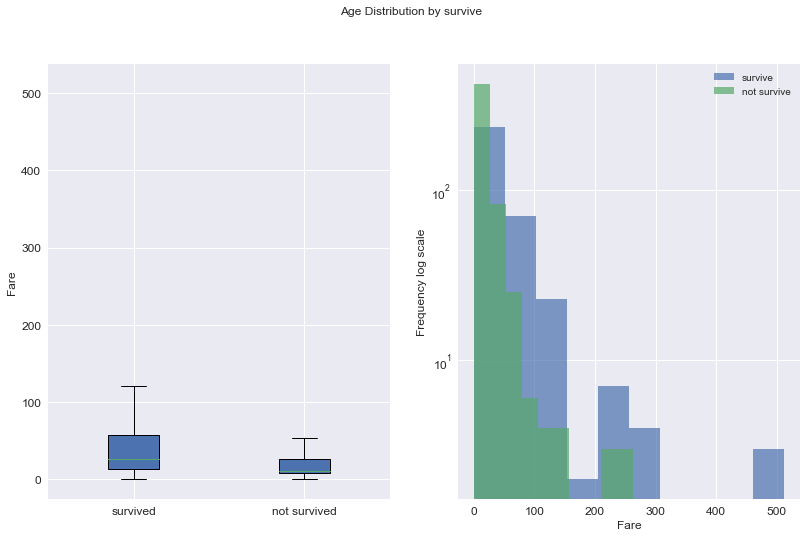

In [133]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

data = [raw_df_train[raw_df_train['Survived'] == 1].Fare.values.tolist()] + [raw_df_train[raw_df_train['Survived'] == 0].Fare.values.tolist()]
labels = ['survived', 'not survived']

ax1.boxplot(data, patch_artist=True, labels=labels, widths=0.3)
# ax1.boxplot(raw_df_train[raw_df_train['Survived'] == 0].Age.values.tolist())
ax1.set_ylabel('Fare')

ax2.hist(raw_df_train[raw_df_train['Survived'] == 1].Fare.values.tolist(), alpha=0.7, label='survive', log=True)
ax2.hist(raw_df_train[raw_df_train['Survived'] == 0].Fare.values.tolist(), alpha=0.7, label='not survive', log=True)
ax2.set_ylabel('Frequency log scale')
ax2.set_xlabel('Fare')
ax2.legend()

plt.suptitle('Fare Distribution by survive')
#plt.tight_layout()
plt.show()

# conclusion --> survived people pay more fare; Fare is highly positive skewed

In [108]:
matplotlib.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']